# **Predicting Health Insurance**

**Introduction to Data Science 2024/2025 | Group xxx**

| Name          | Number      |
| ------------- | ----------- |
| Athos Freitas | up202108792 |
| José Santos   | up202108729 |
| Luís Du       | up202105385 |

## **Table of contents**

- [1. Business Understanding](#1-business-understanding)
- [2. Data Understanding](#2-data-understanding)
  - [2.1. Initial Data Collection](#21-initial-data-collection-and-description)
  - [2.2. Data Description](#22-data-description)
  - [2.3. Data Exploration](#23-data-exploration)
    - [2.3.1. Age](#231-age)
    - [2.3.2. Income](#232-income)
    - [2.3.3. Income by age group](#233-income-by-age-group)
    - [2.3.4. Probability of health insurance by age]()
    - [2.3.5. Marital status by housing type]()
    - [2.3.6. Health insurance by marital status]()
    - [2.3.7. Correlation Matrix]()
    - [2.3.8. Customer by state of residence]()
    - [2.3.9. Code column by state of residence]()


## **1. Business Understanding**

| **Category**                          | **Details**                                                                 |
|---------------------------------------|-----------------------------------------------------------------------------|
| Background                            | In the US, health insurance is important for the financial security of the population. Companies aim to improve enrollment rates. Predicting whether a customer is likely to take up insurance can help optimize resource allocation and improve customer engagement strategies. |
| Business Objectives                   | Build a model to predict which of your customers don’t have health insurance. |
| Business Success Criteria             | Successfully predict the customers that don't have health insurance according to the provided data. |
| Inventory of Resources                | **Data**: A dataset with demographic and behavioral attributes such as employment status, income, housing type, marital status, and more. <br> **Tools**: Python Libraries, Jupyter Notebook. |
| Requirements                          | ???                                                                          |
| Assumptions                           | Data accurately reflects the characteristics of customers.                   |
| Constraints                           | Data imbalance in certain attributes.                                        |
| Risks and Contingencies               | **Risk**: Missing values or noisy data could reduce model accuracy. <br> **Contingency**: Data cleaning and preprocessing steps. |
| Costs and Benefits                    | **Costs**: Initial setup, data preprocessing, and operationalizing the model. <br> **Benefits**: Improved conversion rates and data-driven decision-making. |
| Data Mining Goals                     | Develop a predictive model to classify customers based on their likelihood to purchase health insurance. <br> Identify the most influential factors that drive insurance uptake. |
| Data Mining Success Criteria          | Model accuracy above 80%. <br> Identify the top 5 features that influence insurance uptake. |


## **2. Data Understanding**

### **2.1. Initial Data Collection**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('customer.csv')

df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


### **2.2. Data Description**

In [4]:
df.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


#### ➜ **Number of observations and variables**

In [5]:
df.shape

(72458, 15)

#### ➜ **Variable types**

| Type        | Number | Variables                                                        |
| ----------- | ------ | ---------------------------------------------------------------- |
| Numeric     | 7      | unamed, income, num_vehicles, age, code_column, gas_usage, rooms |
| Text        | 2      | custid, state_of_res                                             |
| Categorical | 3      | sex, marital_status, housing_type                                |
| Boolean     | 3      | is_employed, health_ins, recent_move_b                           |

#### ➜ **Missing values**

In [6]:
df.isnull().sum()

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

#### ➜ **Duplicate rows**

In [7]:
df.duplicated().sum()

np.int64(0)

### **2.3. Data Exploration**

#### **2.3.1. Age**

##### **➜ Age Statistics**

In [8]:
def plot_statistics(feature):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Boxplot')
    plt.show()
    
    stats = df[feature].describe()
    print(stats)

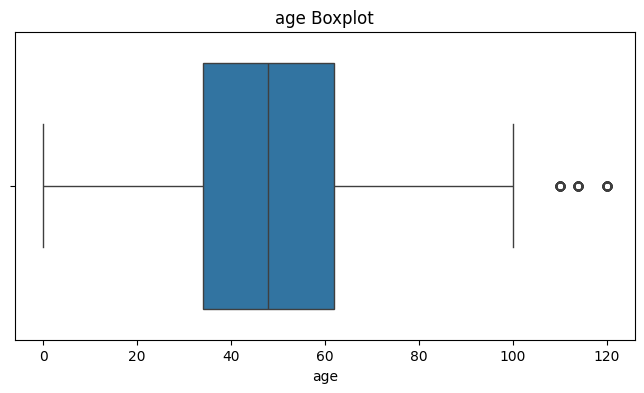

count    72458.000000
mean        49.208893
std         18.090035
min          0.000000
25%         34.000000
50%         48.000000
75%         62.000000
max        120.000000
Name: age, dtype: float64


In [9]:
plot_statistics('age')

##### **➜ Age Distribution**

Most of the customers are young or early 40s, between 18 and 45 years old.

In [10]:
def plot_distribution(feature, plot_outliers = True):
    
    # Calculate outliers using the IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Split the data into inliers and outliers
    inliers = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)][feature]
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    # Plot inliers (blue) and outliers (light red)
    sns.histplot(inliers, kde=True, bins=20, color='blue', label='Inliers') 
    if plot_outliers:
        sns.histplot(outliers, kde=True, bins=20, color='lightcoral', label='Outliers')
        plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
        plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

    plt.legend()
    plt.title(f'{feature} Distribution')
    plt.show()

In [11]:
def plot_inliers_distribution(feature):
    plot_distribution(feature, False)

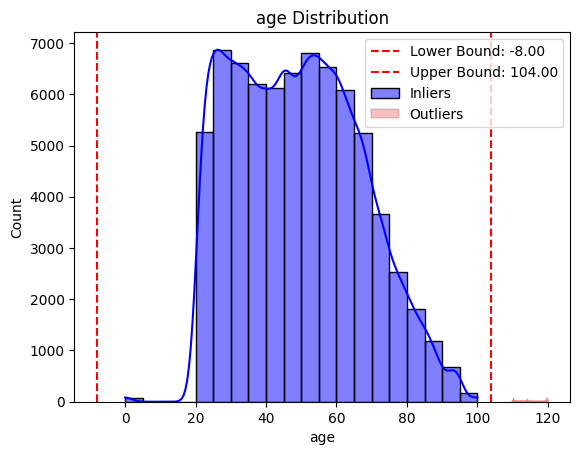

In [12]:
plot_distribution('age')

#### **2.3.2. Income**

##### **➜ Income Statistics**

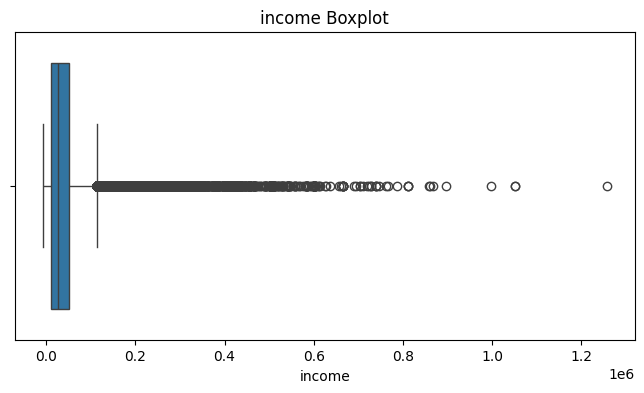

count    7.245800e+04
mean     4.188143e+04
std      5.827460e+04
min     -6.900000e+03
25%      1.070000e+04
50%      2.640000e+04
75%      5.200000e+04
max      1.257000e+06
Name: income, dtype: float64


In [13]:
plot_statistics('income')

##### **➜ Income Distribution**

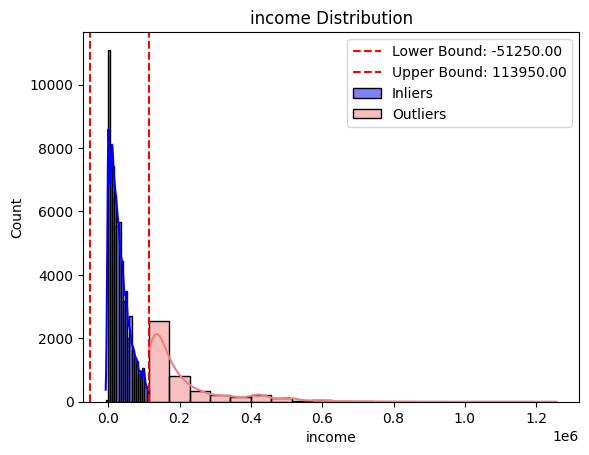

In [14]:
plot_distribution('income')

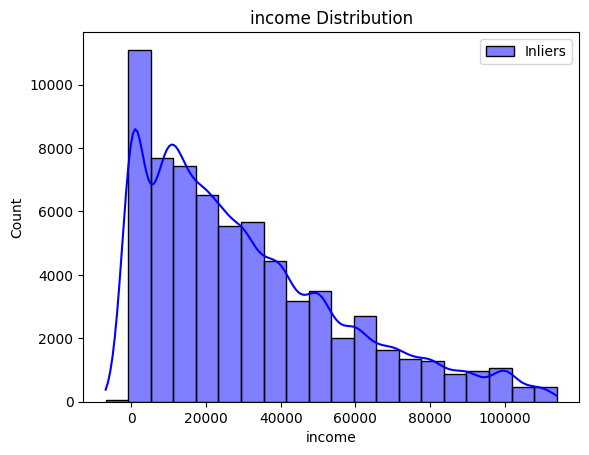

In [15]:
plot_inliers_distribution('income')

#### **2.3.3. Income by age group**

##### **➜ Scatterplot**

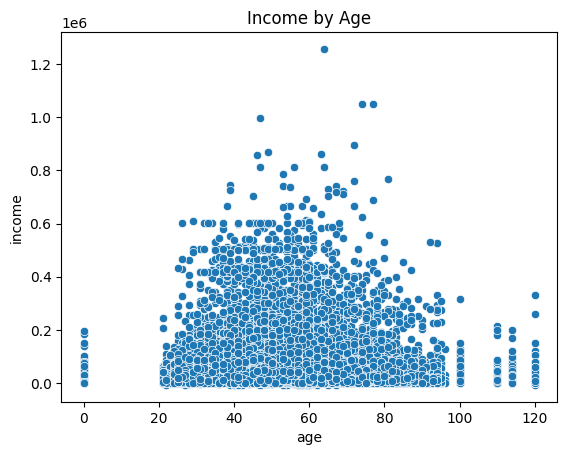

In [16]:
sns.scatterplot(x='age', y='income', data=df)
plt.title('Income by Age')
plt.show()

##### **➜ Boxplot**

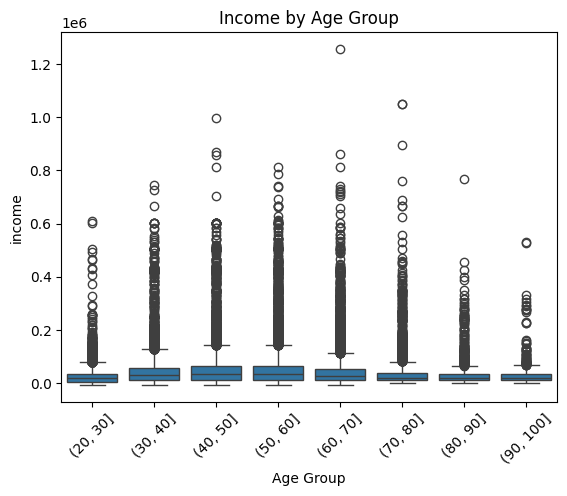

In [17]:
sns.boxplot(x=pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100]), y='income', data=df)
plt.title('Income by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

#### **2.3.4. Probability of health insurance by age**

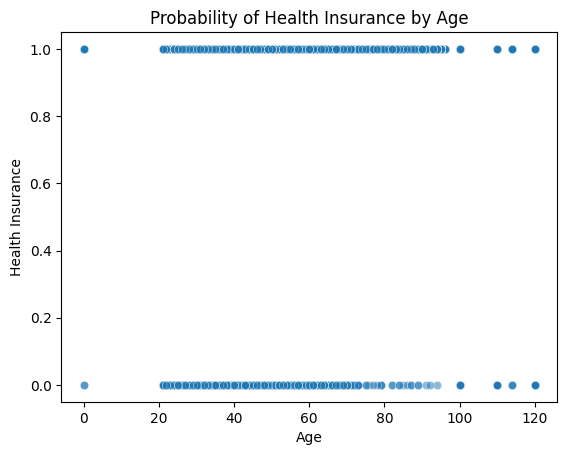

In [18]:
sns.scatterplot(x='age', y='health_ins', data=df, alpha=0.5)
plt.title('Probability of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Health Insurance')
plt.show()

#### **2.3.5. Marital status by housing type**

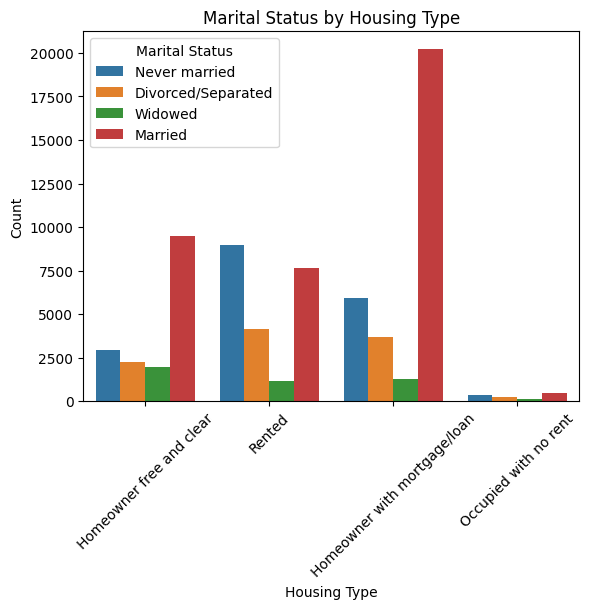

In [19]:
sns.countplot(x='housing_type', hue='marital_status', data=df)
plt.title('Marital Status by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

#### **2.3.6. Health insurance by marital status**

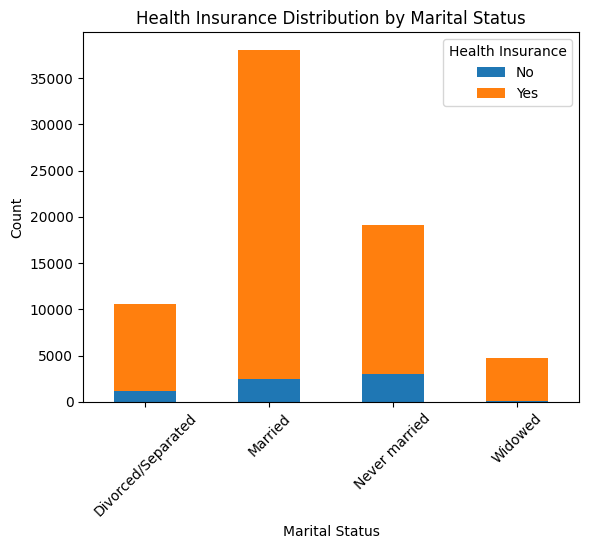

In [20]:
pd.crosstab(df['marital_status'], df['health_ins']).plot(kind='bar', stacked=True)
plt.title('Health Insurance Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

#### **2.3.7. Correlation Matrix**

##### **➜ Correlation of rooms, housing_type_num, gas_usage**

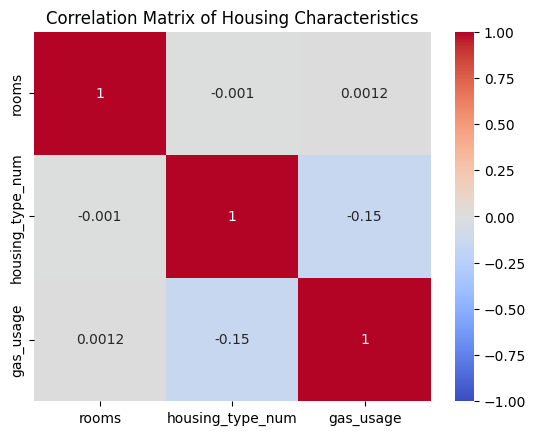

In [21]:
df['housing_type_num'] = df['housing_type'].astype('category').cat.codes

correlation_matrix = df[['rooms', 'housing_type_num', 'gas_usage']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Housing Characteristics')
plt.show()

##### **➜ Correlation of numerical features**

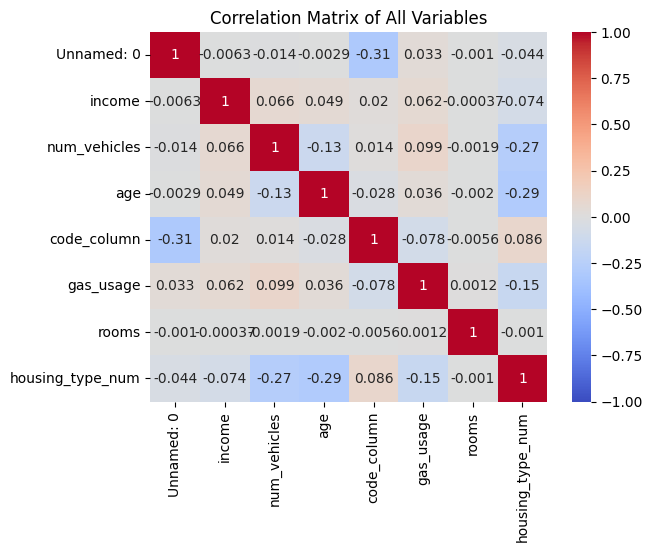

In [22]:

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix_all = numeric_df.corr()

sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Variables')
plt.show()

### **2.3.8. Customers by State of residence**

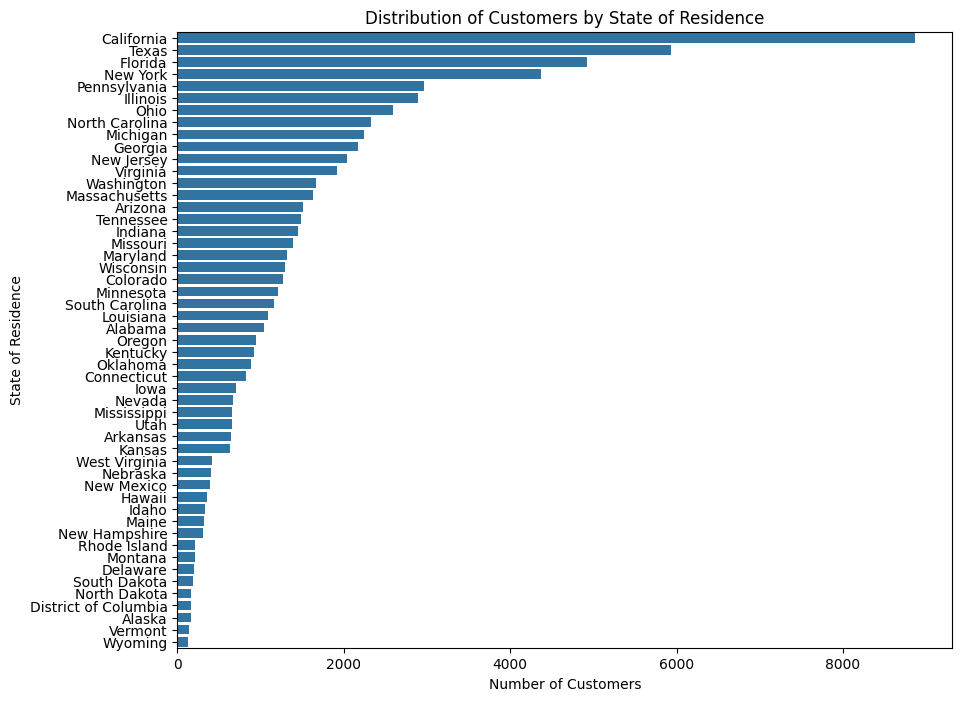

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(y='state_of_res', data=df, order=df['state_of_res'].value_counts().index)
plt.title('Distribution of Customers by State of Residence')
plt.xlabel('Number of Customers')
plt.ylabel('State of Residence')
plt.show()

#### **3.3.9. Code column by state of residence**

In [24]:
# Find states with more than one unique code_column
states_with_multiple_codes = df.groupby('state_of_res')['code_column'].nunique()
states_with_multiple_codes = states_with_multiple_codes[states_with_multiple_codes > 1]

# Display the result
print(states_with_multiple_codes)

Series([], Name: code_column, dtype: int64)


## Data Preparation

In [25]:
# drop rows with age == 0 or age == 120
df = df[df["age"] != 0]
df = df[df["age"] != 120]

In [26]:
df.rename({'Unnamed: 0':'idx'}, axis=1, inplace=True)
df.set_index("idx", inplace = True)
df.head()



,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,housing_type_num
idx,,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,0
8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,3
9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,1
10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,0
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,3


In [27]:
df.is_employed.value_counts(dropna=False)

is_employed
True     44547
NaN      25459
False     2309
Name: count, dtype: int64

In [28]:
df['is_employed'] = df['is_employed'].fillna(False)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21400\2175004513.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_employed'] = df['is_employed'].fillna(False)


,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,housing_type_num
idx,,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,0
8,000007827_01,Female,False,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,3
9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,1
10,000008529_01,Female,False,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,0
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,3


In [29]:
df['income'] = df['income'].fillna(df['income'].median())

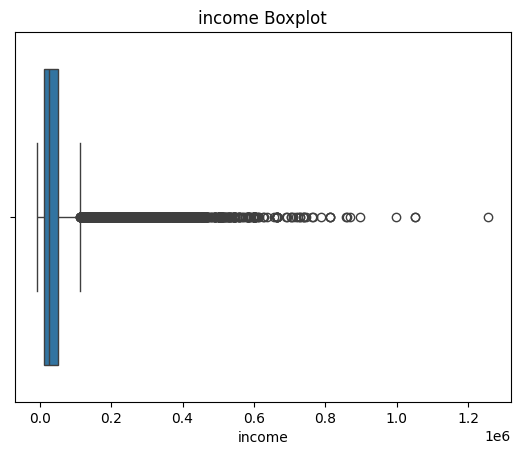

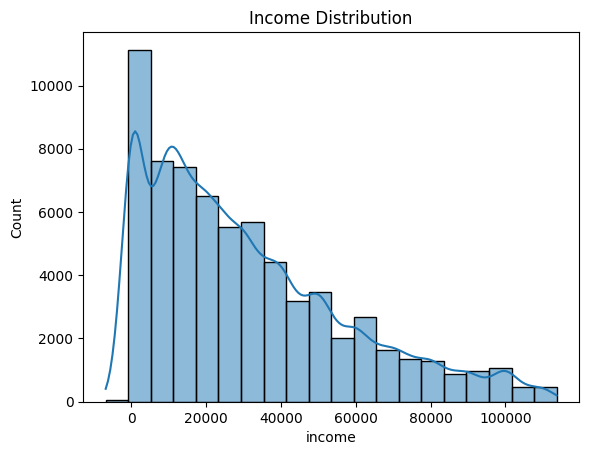

In [30]:
sns.boxplot(x='income',data=df)
plt.title('income Boxplot')

plt.show()

Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['income'] > (Q1 - 1.5 * IQR)) & (df['income'] < (Q3 + 1.5 * IQR))]

sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')

plt.show()

In [31]:
df['income']= (df['income'] - df['income'].mean()) / df['income'].std()

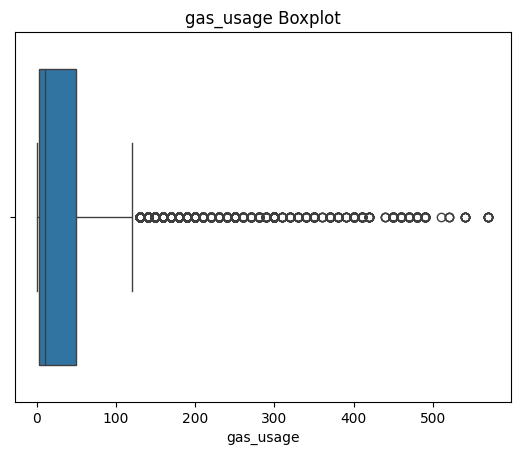

In [32]:
sns.boxplot(x='gas_usage',data=df)
plt.title('gas_usage Boxplot')

plt.show()


In [33]:
df['gas_usage'] = df['gas_usage'].fillna(df[df['gas_usage'] > 3]['gas_usage'].mean())


In [34]:
df['housing_type'] = df['housing_type'].fillna(df['housing_type'].mode()[0])


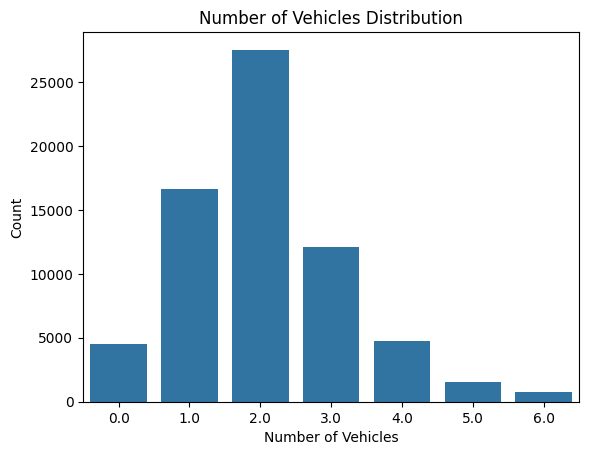

In [35]:
df['num_vehicles'] = df['num_vehicles'].fillna(round(df['num_vehicles'].mean(),0))

sns.countplot(x='num_vehicles', data=df)
plt.title('Number of Vehicles Distribution')
plt.xlabel('Number of Vehicles')
plt.ylabel('Count')
plt.show()

In [36]:
df['recent_move_b'].value_counts()

df['recent_move_b'] = df['recent_move_b'].replace({'T': True, 'F': False})

df['recent_move_b'] = df['recent_move_b'].fillna(df['recent_move_b'].mode()[0])

C:\Users\User\AppData\Local\Temp\ipykernel_21400\3084544823.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recent_move_b'] = df['recent_move_b'].fillna(df['recent_move_b'].mode()[0])


In [37]:
df.drop(columns=['state_of_res'],inplace=True)
df.drop(columns=['housing_type'],inplace=True)

In [38]:

encoded_df = pd.get_dummies(df, columns=['marital_status'], prefix='', prefix_sep='')

encoded_df = encoded_df.rename(columns={
    'Divorced/Separated': 'Divorced_Separated',
    'Married': 'Married',
    'Never married': 'Never_married',
    'Widowed': 'Widowed'
})

df = encoded_df

df.drop(columns=['Never_married'],inplace=True)

In [39]:
encoded_df = pd.get_dummies(df, columns=['sex'], prefix='', prefix_sep='')


df = encoded_df

df.drop(columns=['Female'],inplace=True)    

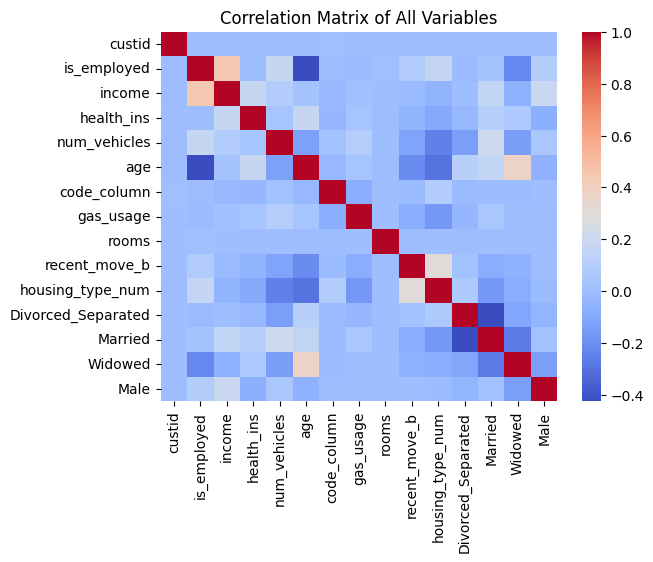

In [40]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm',)
plt.title('Correlation Matrix of All Variables')
plt.show()


In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(columns='health_ins')  
y = df['health_ins']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [42]:
print("Original class distribution:")
print(y_train.value_counts())
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
health_ins
True     48741
False     5501
Name: count, dtype: int64

Resampled class distribution:
health_ins
True     48741
False    48741
Name: count, dtype: int64


In [43]:
df

,custid,is_employed,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,housing_type_num,Divorced_Separated,Married,Widowed,Male
idx,,,,,,,,,,,,,,,
7,000006646_03,True,-0.333244,True,0.0,24,1047,210.000000,3,False,0,False,False,False,True
8,000007827_01,False,-0.287999,True,0.0,82,1047,3.000000,6,True,3,True,False,False,False
9,000008359_04,True,-0.370949,True,2.0,31,1047,40.000000,3,False,1,False,False,False,False
10,000008529_01,False,0.261349,True,1.0,93,1047,120.000000,2,False,0,False,False,True,False
11,000008744_02,True,0.307725,True,2.0,67,1047,3.000000,2,False,3,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,001506841_02,True,-0.465209,False,1.0,25,131,10.000000,4,False,3,False,False,False,False
99997,001507219_01,False,-0.378489,True,1.0,86,131,120.000000,6,False,0,False,False,True,False
99998,001513103_01,True,1.665073,True,2.0,50,131,90.000000,3,False,1,False,True,False,True


## Modeling

Accuracy: 0.44
              precision    recall  f1-score   support

       False       0.10      0.62      0.18      1315
        True       0.91      0.42      0.58     12246

    accuracy                           0.44     13561
   macro avg       0.51      0.52      0.38     13561
weighted avg       0.83      0.44      0.54     13561



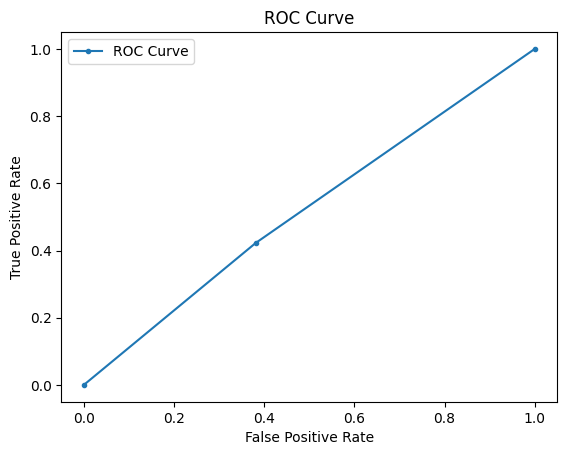

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

model = GaussianNB()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_report = classification_report(y_test, y_pred)
print(class_report)

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



### Authors: 

- José Santos up202108729
- Luís Du up202105385
- Athos Freitas up202108792